$$Data cleaning$$

In [3]:
pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_csv('credit_scoring.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
len(df)

21525

In [8]:
data = np.loadtxt('credit_scoring.csv', skiprows=1, delimiter=',', dtype=object)

In [9]:
data

array([['1', '-8437.673027760233', '42', ..., '0', '253875.6394525987',
        'purchase of the house'],
       ['1', '-4024.803753850451', '36', ..., '0', '112080.01410244203',
        'car purchase'],
       ['0', '-5623.422610230956', '33', ..., '0', '145885.95229686378',
        'purchase of the house'],
       ...,
       ['1', '-2113.3468876977263', '38', ..., '1', '89672.56115303475',
        'property'],
       ['3', '-3112.4817051958507', '38', ..., '1', '244093.0505004255',
        'buying my own car'],
       ['2', '-1984.5075885305268', '40', ..., '0', '82047.41889948228',
        'to buy a car']], shape=(21525, 12), dtype=object)

In [10]:
df.values

array([[1, -8437.673027760233, 42, ..., 0, 253875.6394525987,
        'purchase of the house'],
       [1, -4024.803753850451, 36, ..., 0, 112080.01410244204,
        'car purchase'],
       [0, -5623.422610230956, 33, ..., 0, 145885.95229686378,
        'purchase of the house'],
       ...,
       [1, -2113.3468876977263, 38, ..., 1, 89672.56115303475,
        'property'],
       [3, -3112.4817051958507, 38, ..., 1, 244093.0505004255,
        'buying my own car'],
       [2, -1984.5075885305268, 40, ..., 0, 82047.41889948228,
        'to buy a car']], shape=(21525, 12), dtype=object)

In [11]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [12]:
df.isna().sum()/len(df)*100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

In [13]:
df1 = df.select_dtypes('number').copy()

In [14]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [15]:
df['days_employed']=df['days_employed'].fillna(df['days_employed'].mean())

In [16]:
df['total_income']=df['total_income'].fillna(df['total_income'].mean())

In [17]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [18]:
df.select_dtypes(np.number)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
0,1,-8437.673028,42,0,0,0,253875.639453
1,1,-4024.803754,36,1,0,0,112080.014102
2,0,-5623.422610,33,1,0,0,145885.952297
3,3,-4124.747207,32,1,0,0,267628.550329
4,0,340266.072047,53,1,1,0,158616.077870
...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,1,1,0,224791.862382
21521,0,343937.404131,67,1,0,0,155999.806512
21522,1,-2113.346888,38,1,1,1,89672.561153
21523,3,-3112.481705,38,1,0,1,244093.050500


In [28]:
for column_name in df.select_dtypes(np.number).columns:
    m = df[column_name].mean()
    df.loc[df['days_employed'].isna(), 'days_employed']=m
    #df[column_name].fillna(m, inplace=True)

In [31]:
df['days_employed'].isna().sum()

np.int64(0)

In [38]:
pip install scikit-learn

     ---------------------------------------- 10.7/10.7 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 41.3/41.3 MB 863.0 kB/s eta 0:00:00
     -------------------------------------- 307.7/307.7 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
df2 = df.select_dtypes('number').copy()

In [41]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')

In [42]:
imp.fit(df2)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [44]:
data = imp.transform(df2)

In [45]:
type(data)

numpy.ndarray

In [46]:
df2_filled = pd.DataFrame(data=data, columns=df2.columns)

In [47]:
df2_filled.isna().sum()

children            0
days_employed       0
dob_years           0
education_id        0
family_status_id    0
debt                0
total_income        0
dtype: int64

<Axes: >

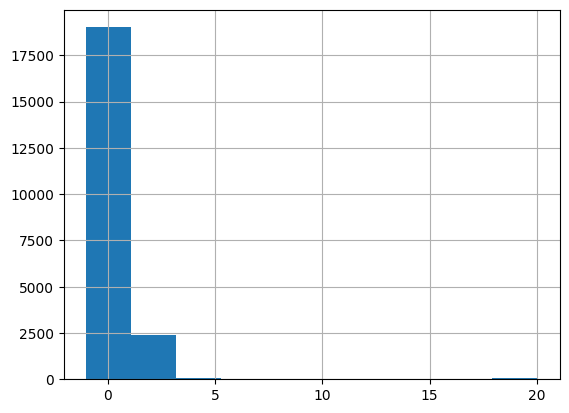

In [49]:
df['children'].hist()